### 相对位置编码可视化
Position Embedding本身是一个**绝对位置**的信息，但在语言中，**相对位置**也很重要。
Google选择这个位置向量公式的一个重要原因是：由于我们有这张图片展示了一个三角恒等式，即两角和的正弦公式。公式内容如下：
$$\sin(\alpha + \beta) = \sin \alpha \cos \beta + \cos \alpha \sin \beta$$
这是一个基本的三角学公式，用于计算两个角度之和的正弦值。公式左边是两个角度的和的正弦，右边则是这两个角的正弦和余弦的组合。

 以及 $$\cos(\alpha+\beta)=\cos\alpha\cos\beta-\sin\alpha\sin\beta $$ 这表明位置 $p+k$ 的向量可以表示成位置 $p$ 的向量的**线性变换**，这种机制便于模型捕捉序列中不同位置的元素之间的相对位置关系。

2.0.1+cu117


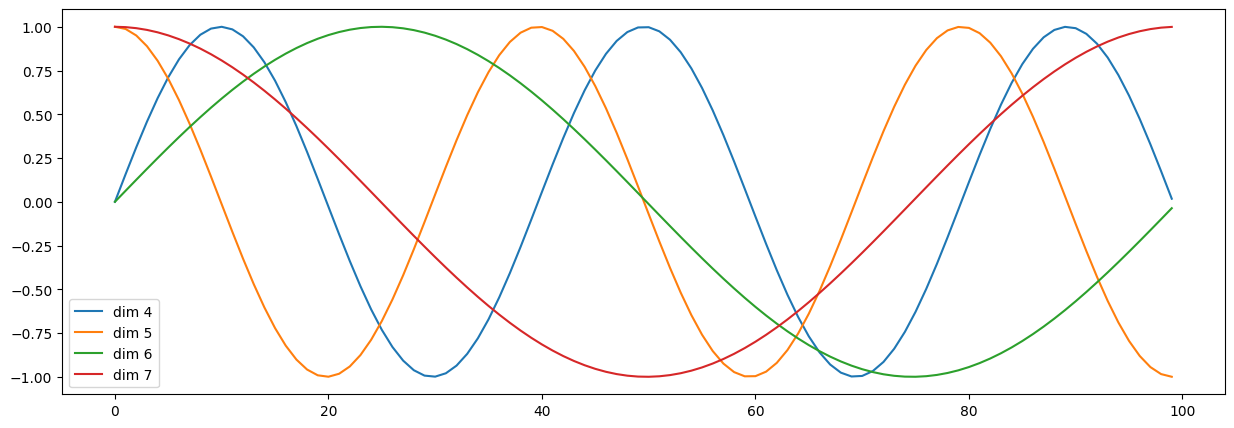

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import math

print(torch.__version__)


# 定义 PositionalEncoding 类
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        # 创建一个足够长的位置编码张量，初始化为0
        # max_len 是位置编码的最大长度，d_model 是编码的维度
        self.encoding = torch.zeros(max_len, d_model)
        # 创建位置张量，形状为 (max_len, 1)
        position = torch.arange(0, max_len).unsqueeze(1)
        # 计算正弦和余弦函数中的分母部分，形状为 (d_model // 2,)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        # 计算正弦编码，并填充到偶数索引位置
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        # 计算余弦编码，并填充到奇数索引位置
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        # 增加一个批次维度，以便于广播操作
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        # 将位置编码与输入张量相加
        # x 的形状为 (batch_size, seq_len, d_model)
        # 我们只取位置编码的前 seq_len 个位置
        return x + self.encoding[:, :x.size(1)]

# 创建 PositionalEncoding 实例，设置编码维度为20，最大长度为100
pe = PositionalEncoding(20, max_len=100)  # max_len 应该至少与输入序列长度相等

# 创建一个全零张量来模拟输入序列，形状为 (1, 100, 20)
# 这代表一个批次大小为1的序列，序列长度为100，编码维度为20
y = pe.forward(torch.zeros(1, 100, 20))

# 绘制位置编码
plt.figure(figsize=(15, 5))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend(["dim %d" % p for p in [4, 5, 6, 7]])
plt.show()  

In [2]:
import numpy as np
print(np.__version__)

1.26.4


### 位置编码可视化

Positional Encoding的公式如下：

$PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{2i/d_{model}}}\right)$

$PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{2i/d_{model}}}\right)$

其中， $pos$ 表示单词在序列中的位置（从零开始）， $2i$ 和 $2i+1$ 表示维度索引（从 $1$ 到 $ d_{model}$ ）， $d_{model}$ 表示词向量的维度（embedding size）， $10000$ 一个比较大的常数用于放缩。

每个位置的词向量都有一个特定的位置编码。

[[ 0.          1.          0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.04639922  0.99892298  0.00215443  0.99999768]
 [ 0.90929743 -0.41614684  0.0926985   0.99569422  0.00430886  0.99999072]
 [ 0.14112001 -0.9899925   0.1387981   0.9903207   0.00646326  0.99997911]
 [-0.7568025  -0.65364362  0.18459872  0.98281398  0.00861763  0.99996287]
 [-0.95892427  0.28366219  0.23000171  0.97319022  0.01077197  0.99994198]
 [-0.2794155   0.96017029  0.27490927  0.96147017  0.01292625  0.99991645]
 [ 0.6569866   0.75390225  0.31922465  0.94767907  0.01508047  0.99988628]
 [ 0.98935825 -0.14550003  0.36285241  0.93184662  0.01723462  0.99985147]
 [ 0.41211849 -0.91113026  0.40569857  0.91400693  0.0193887   0.99981202]]


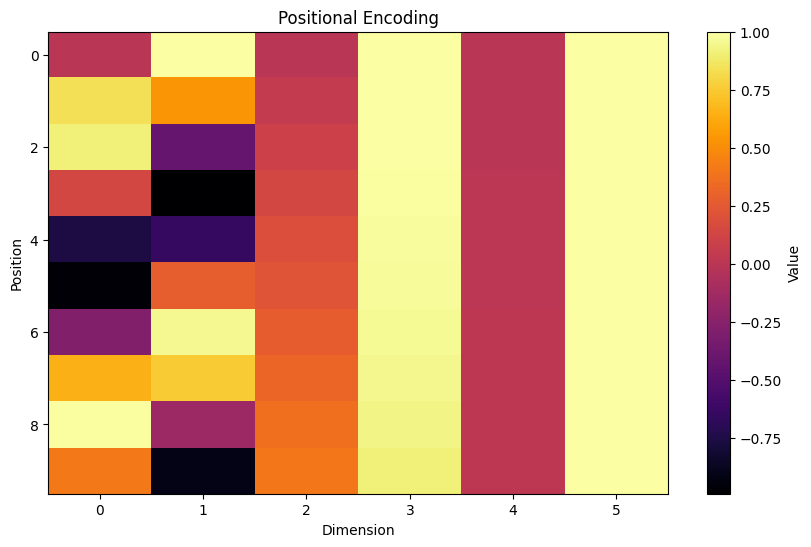

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(pos, d):
    PE = np.zeros((pos, d))
    for p in range(pos):
        for i in range(0, d, 2):
            PE[p, i] = np.sin(p / (10000 ** (i / d)))
            if i + 1 < d:
                PE[p, i + 1] = np.cos(p / (10000 ** (i / d)))
    return PE

# 生成位置编码
pos = 10  # 序列长度
d = 6     # 嵌入维度
PE = positional_encoding(pos, d)

print(PE)
# 可视化
plt.figure(figsize=(10, 6))
# 修改颜色映射 cmap 的值可以改变颜色风格
# 修改 aspect 的值可以改变显示比例
# cmap='plasma', 'viridis', 'inferno', 'magma'
plt.imshow(PE, cmap='inferno', aspect='auto')  
plt.xlabel('Dimension')
plt.xlabel('Dimension')
plt.ylabel('Position')
plt.colorbar(label='Value')
plt.title('Positional Encoding')
plt.show()